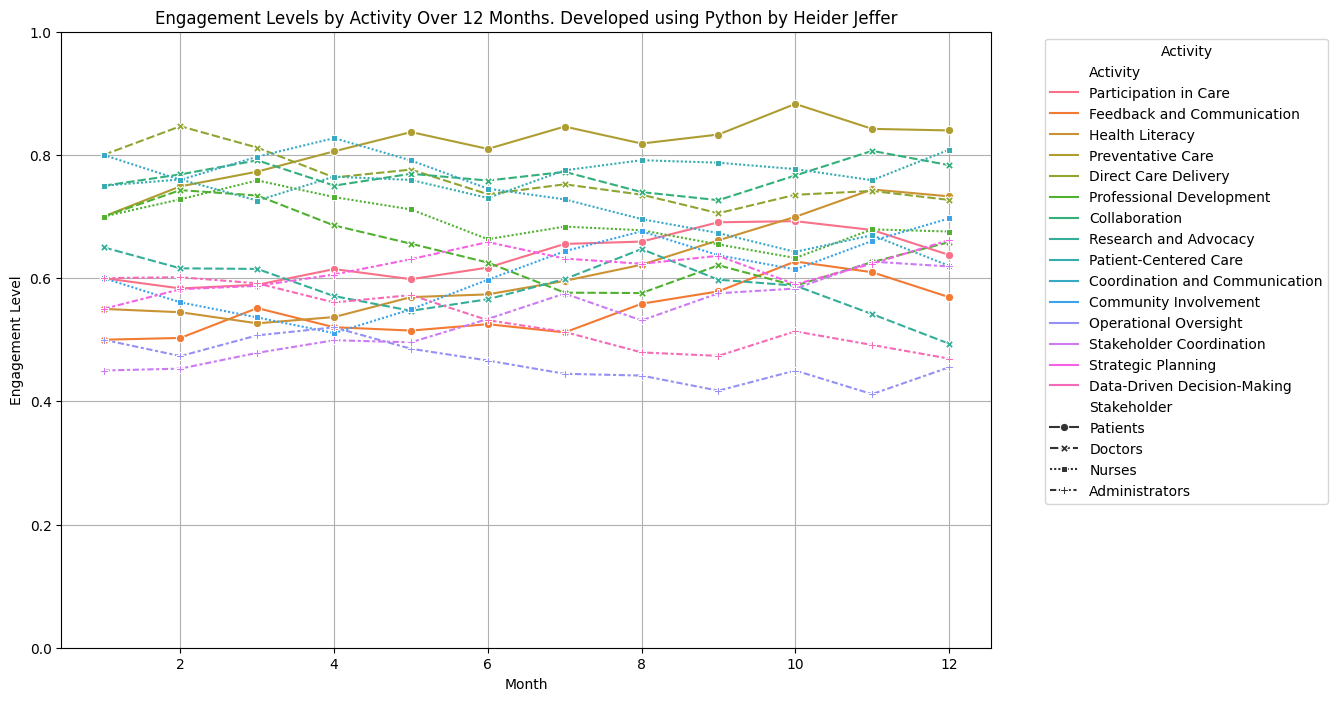

Average Engagement Levels by Stakeholder and Activity:
Stakeholder     Activity                      
Administrators  Data-Driven Decision-Making       0.533160
                Operational Oversight             0.464399
                Stakeholder Coordination          0.535069
                Strategic Planning                0.615070
Doctors         Collaboration                     0.765250
                Direct Care Delivery              0.760932
                Professional Development          0.649049
                Research and Advocacy             0.585865
Nurses          Community Involvement             0.606883
                Coordination and Communication    0.729103
                Patient-Centered Care             0.765691
                Professional Development          0.691376
Patients        Feedback and Communication        0.547423
                Health Literacy                   0.612965
                Participation in Care             0.634679
             

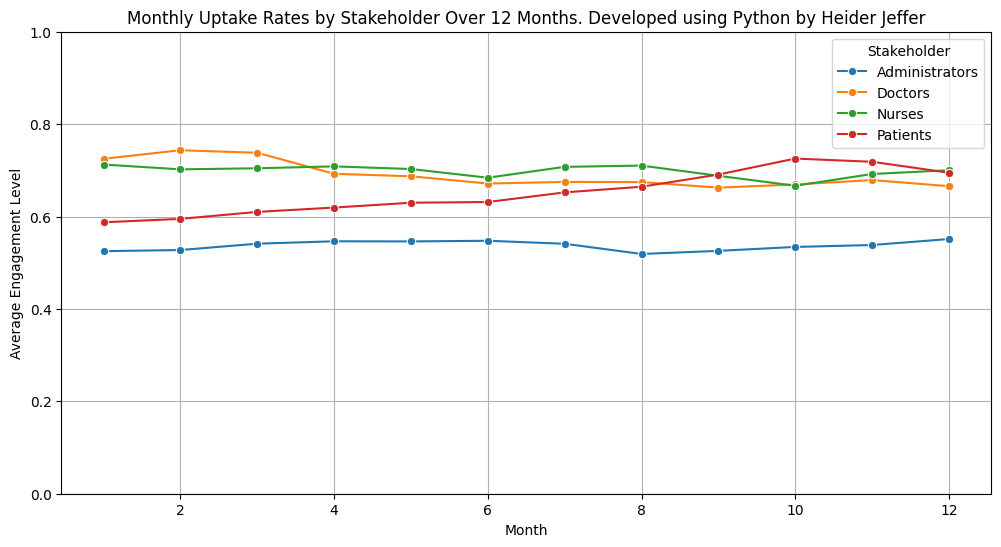


Qualitative Analysis:

Stakeholder Engagement Trends:

Patients:
  - Participation in Care: Avg Engagement = 0.63
    * Noticeable fluctuation in engagement from 0.58 to 0.69. Consider strategies to stabilize this.
  - Feedback and Communication: Avg Engagement = 0.55
    * Noticeable fluctuation in engagement from 0.50 to 0.63. Consider strategies to stabilize this.
  - Health Literacy: Avg Engagement = 0.61
    * Noticeable fluctuation in engagement from 0.53 to 0.74. Consider strategies to stabilize this.
  - Preventative Care: Avg Engagement = 0.81
    * Noticeable fluctuation in engagement from 0.70 to 0.88. Consider strategies to stabilize this.

Doctors:
  - Direct Care Delivery: Avg Engagement = 0.76
    * Noticeable fluctuation in engagement from 0.71 to 0.85. Consider strategies to stabilize this.
  - Professional Development: Avg Engagement = 0.65
    * Noticeable fluctuation in engagement from 0.58 to 0.74. Consider strategies to stabilize this.
  - Collaboration: Avg Enga

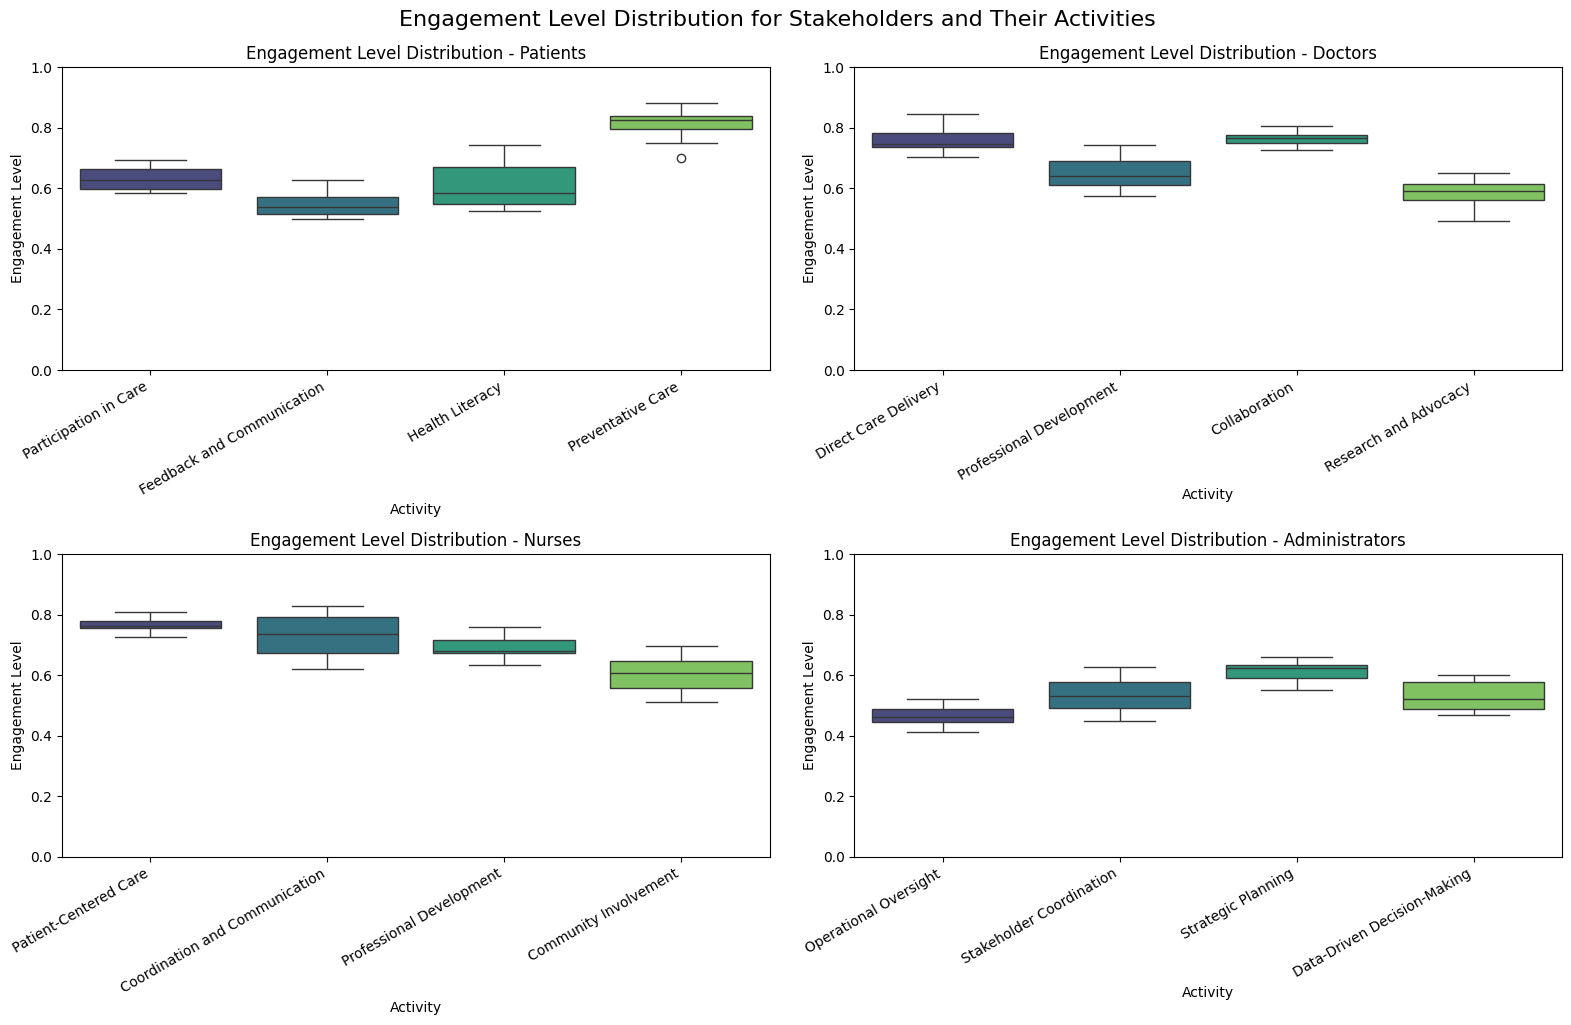

In [14]:
# Dynamic Stakeholder Engagement Simulation and Analysis in Healthcare
# Quantitative and Qualitative Analysis of Stakeholder Engagement Simulation
# Developed using Python by Heider Jeffer
# The code is expandable by design.
# The code is cutting edge rolling release, frequently delivering updates to applications

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define stakeholders, their activities, and base engagement levels for each activity
stakeholders = {
    'Patients': {
        'activities': {
            'Participation in Care': 0.6,
            'Feedback and Communication': 0.5,
            'Health Literacy': 0.55,
            'Preventative Care': 0.7
        }
    },
    'Doctors': {
        'activities': {
            'Direct Care Delivery': 0.8,
            'Professional Development': 0.7,
            'Collaboration': 0.75,
            'Research and Advocacy': 0.65
        }
    },
    'Nurses': {
        'activities': {
            'Patient-Centered Care': 0.75,
            'Coordination and Communication': 0.8,
            'Professional Development': 0.7,
            'Community Involvement': 0.6
        }
    },
    'Administrators': {
        'activities': {
            'Operational Oversight': 0.5,
            'Stakeholder Coordination': 0.45,
            'Strategic Planning': 0.55,
            'Data-Driven Decision-Making': 0.6
        }
    }
}

# Function to simulate engagement levels for each activity over time
# Simulation Code Highlights
def simulate_activity_engagement(stakeholders, months=12, fluctuation=0.05):
    """Simulate engagement levels for each activity of all stakeholders over time."""
    # Engagement simulation logic...
    engagement_over_time = []
    for stakeholder, data in stakeholders.items():
        for activity, base_engagement in data['activities'].items():
            monthly_engagement = [base_engagement]
            for _ in range(1, months):
                # Simulate random fluctuation for each month
                change = np.random.uniform(-fluctuation, fluctuation)
                new_engagement = max(0, min(1, monthly_engagement[-1] + change))
                monthly_engagement.append(new_engagement)
            # Store results for each activity
            for month, engagement in enumerate(monthly_engagement, start=1):
                engagement_over_time.append({
                    'Stakeholder': stakeholder,
                    'Activity': activity,
                    'Month': month,
                    'Engagement': engagement
                })
    return pd.DataFrame(engagement_over_time)

# Simulate engagement levels
months = 12  # Change this value to adjust the simulation duration
df_activity_engagement = simulate_activity_engagement(stakeholders, months=months)

# Visualization of Engagement Levels by Activity
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_activity_engagement, x='Month', y='Engagement', hue='Activity', style='Stakeholder', markers=True)
plt.title(f"Engagement Levels by Activity Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Engagement Level")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Activity")
plt.grid()
plt.show()

# Analyzing Average Engagement Levels by Activity
average_engagement = df_activity_engagement.groupby(['Stakeholder', 'Activity'])['Engagement'].mean()
print("Average Engagement Levels by Stakeholder and Activity:")
print(average_engagement)

# Aggregated Uptake Rate by Stakeholder
def calculate_uptake_rate(df):
    """Calculate uptake rate as the mean engagement across all activities for each stakeholder."""
    return df.groupby('Stakeholder')['Engagement'].mean()

uptake_rates = calculate_uptake_rate(df_activity_engagement)
print("\nOverall Uptake Rate by Stakeholder:")
print(uptake_rates)

# Visualizing Uptake Rates Over Time
monthly_uptake = df_activity_engagement.groupby(['Month', 'Stakeholder'])['Engagement'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_uptake, x='Month', y='Engagement', hue='Stakeholder', marker="o")
plt.title(f"Monthly Uptake Rates by Stakeholder Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Average Engagement Level")
plt.ylim(0, 1)
plt.grid()
plt.legend(title="Stakeholder")
plt.show()

# Qualitative Analysis

def qualitative_analysis(df, average_engagement, uptake_rates):
    """
    Perform a qualitative analysis to interpret the engagement trends and identify areas for improvement.
    """
    print("\nQualitative Analysis:")

    # 1. Stakeholder Engagement Trends
    print("\nStakeholder Engagement Trends:")
    for stakeholder in df['Stakeholder'].unique():
        print(f"\n{stakeholder}:")
        stakeholder_df = df[df['Stakeholder'] == stakeholder]
        for activity in stakeholder_df['Activity'].unique():
            activity_df = stakeholder_df[stakeholder_df['Activity'] == activity]
            # Access the average engagement using both stakeholder and activity
            avg_engagement = average_engagement[stakeholder, activity]
            print(f"  - {activity}: Avg Engagement = {avg_engagement:.2f}")
            max_engagement = activity_df['Engagement'].max()
            min_engagement = activity_df['Engagement'].min()
            if max_engagement - min_engagement > 0.1:
                print(f"    * Noticeable fluctuation in engagement from {min_engagement:.2f} to {max_engagement:.2f}. Consider strategies to stabilize this.")
            else:
                print(f"    * Engagement is fairly stable for this activity.")

    # 2. Stakeholder Comparison
    print("\nComparison of Stakeholder Engagement Levels:")
    for stakeholder in uptake_rates.index:
        avg_uptake = uptake_rates[stakeholder]
        if avg_uptake < 0.6:
            print(f"  - {stakeholder}: Below average uptake rate ({avg_uptake:.2f}). This suggests potential areas for further engagement or outreach.")
        else:
            print(f"  - {stakeholder}: Above average uptake rate ({avg_uptake:.2f}). This is a positive indicator of stakeholder engagement.")

    # 3. Identifying Key Activities for Improvement
    print("\nIdentifying Key Activities for Improvement:")
    for activity in average_engagement.index.get_level_values(1).unique():
        # Access the average engagement for the activity across all stakeholders
        activity_avg_engagement = average_engagement.xs(activity, level=1).mean()
        if activity_avg_engagement < 0.6:
            print(f"  - Activity: {activity} has a lower than average engagement ({activity_avg_engagement:.2f}). This might need more attention.")
        else:
            print(f"  - Activity: {activity} shows positive engagement levels ({activity_avg_engagement:.2f}).")


# Perform the qualitative analysis
qualitative_analysis(df_activity_engagement, average_engagement, uptake_rates)


# Statistical Distribution Visualization for Stakeholders and Activities
plt.figure(figsize=(16, 10))

# Create a subplot for each stakeholder
stakeholders_list = df_activity_engagement['Stakeholder'].unique()
for i, stakeholder in enumerate(stakeholders_list, 1):
    plt.subplot(2, 2, i)
    stakeholder_df = df_activity_engagement[df_activity_engagement['Stakeholder'] == stakeholder]
    
    # Create a boxplot for each activity
    sns.boxplot(data=stakeholder_df, x='Activity', y='Engagement', hue='Activity', palette="viridis", dodge=False)
    
    # Enhance plot appearance
    plt.title(f"Engagement Level Distribution - {stakeholder}")
    plt.xlabel("Activity")
    plt.ylabel("Engagement Level")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha='right')

# Adjust layout
plt.tight_layout()
plt.suptitle("Engagement Level Distribution for Stakeholders and Their Activities", fontsize=16, y=1.02)
plt.show()


# Explanation of the Python Code
*By Heider Jeffer*

The provided code is a **simulation and analysis tool** for modeling **stakeholder engagement in healthcare**, developed in Python by Heider Jeffer. Below is a breakdown of its components:

---

# 1. Stakeholders and Activities Initialization

The `stakeholders` dictionary defines:
- **Four types of stakeholders** (`Patients`, `Doctors`, `Nurses`, `Administrators`).
- Each stakeholder has a set of **activities** with associated **base engagement levels** (a numerical value between 0 and 1).

Example:
```python
'Patients': {
    'Participation in Care': 0.6,
    'Feedback and Communication': 0.5,
}
```
---

## 2. Simulating Engagement Levels Over Time

### The `simulate_activity_engagement` function:

- Generates monthly engagement levels for each activity and stakeholder over a specified number of months (`months`).
- Adds a random fluctuation (within ±`fluctuation`) to simulate realistic variability.
- Clamps values between 0 and 1 to ensure they remain valid.
- Results are stored in a pandas DataFrame with columns: **Stakeholder**, **Activity**, **Month**, and **Engagement**.

### How It Works:

1. Iterates over stakeholders and their activities.
2. Initializes engagement levels for each activity.
3. Simulates random changes for each subsequent month.
4. Stores data for visualization and analysis.


# Explanation of the Code

The provided code is a **simulation and analysis tool** for modeling **stakeholder engagement in healthcare**, developed in Python by Heider Jeffer. Below is a breakdown of its components:

---

## 1. Stakeholders and Activities Initialization
The `stakeholders` dictionary defines:
- **Four types of stakeholders** (`Patients`, `Doctors`, `Nurses`, `Administrators`).
- Each stakeholder has a set of **activities** with associated **base engagement levels** (a numerical value between 0 and 1).

Example:

```python
'Patients': {
    'Participation in Care': 0.6,
    'Feedback and Communication': 0.5,
   }
   ```

---

## 2. Simulating Engagement Levels Over Time

### The `simulate_activity_engagement` function:

- Generates monthly engagement levels for each activity and stakeholder over a specified number of months (`months`).
- Adds a random fluctuation (within ±`fluctuation`) to simulate realistic variability.
- Clamps values between 0 and 1 to ensure they remain valid.
- Results are stored in a pandas DataFrame with columns: `Stakeholder`, `Activity`, `Month`, and `Engagement`.

### How It Works:

1. Iterates over stakeholders and their activities.
2. Initializes engagement levels for each activity.
3. Simulates random changes for each subsequent month.
4. Stores data for visualization and analysis.

---

## 3. Data Visualization

### Engagement Levels by Activity:

- Line plot of engagement levels across months.
- `sns.lineplot` uses `hue='Activity'` to differentiate activities and `style='Stakeholder'` to identify stakeholders.

### Monthly Uptake Rates by Stakeholder:

- Shows the average engagement level for each stakeholder over time.


---

# 4. Analysis

### a. Average Engagement

Calculated for each stakeholder and activity:

```python
average_engagement = df_activity_engagement.groupby(['Stakeholder', 'Activity'])['Engagement'].mean()
```

### b. Uptake Rates
The `calculate_uptake_rate` function computes:

- The mean engagement across all activities for each stakeholder.

### c. Qualitative Analysis
The `qualitative_analysis` function:

#### Trends:
- Examines fluctuations and stability of engagement levels for each stakeholder's activities.
- Identifies stable activities and those needing intervention due to large fluctuations.

#### Stakeholder Comparison:
- Flags stakeholders with below-average uptake rates for potential improvement.

#### Key Activities for Improvement:
- Highlights activities with average engagement < 0.6, suggesting focus areas.

---

# 5. Usage
### Simulation
The simulation runs for 12 months by default. You can adjust months for a different timeframe:

```Python
df_activity_engagement = simulate_activity_engagement(stakeholders, months=months)
```
### Outputs
- Plots: Show engagement trends and stakeholder uptake over time.
- Printed Analysis: Provides actionable insights about trends, stakeholder performance, and activity improvement.

---

# 6. Expandable Design

- New stakeholders or activities can easily be added to the stakeholders dictionary.
- Fluctuation, simulation duration, or analysis methods can be tuned for specific scenarios.

# 7. Key Features
- Dynamic Simulation: Captures realistic, fluctuating engagement over time.
- Quantitative & Qualitative Analysis: Combines statistical metrics with interpretive insights.
- Visualization: Engages users with clear, insightful plots.
- Extensibility: Supports evolving healthcare scenarios and requirements.

This code is an excellent example of integrating data science tools (like pandas and seaborn) with healthcare management applications for informed decision-making.

---



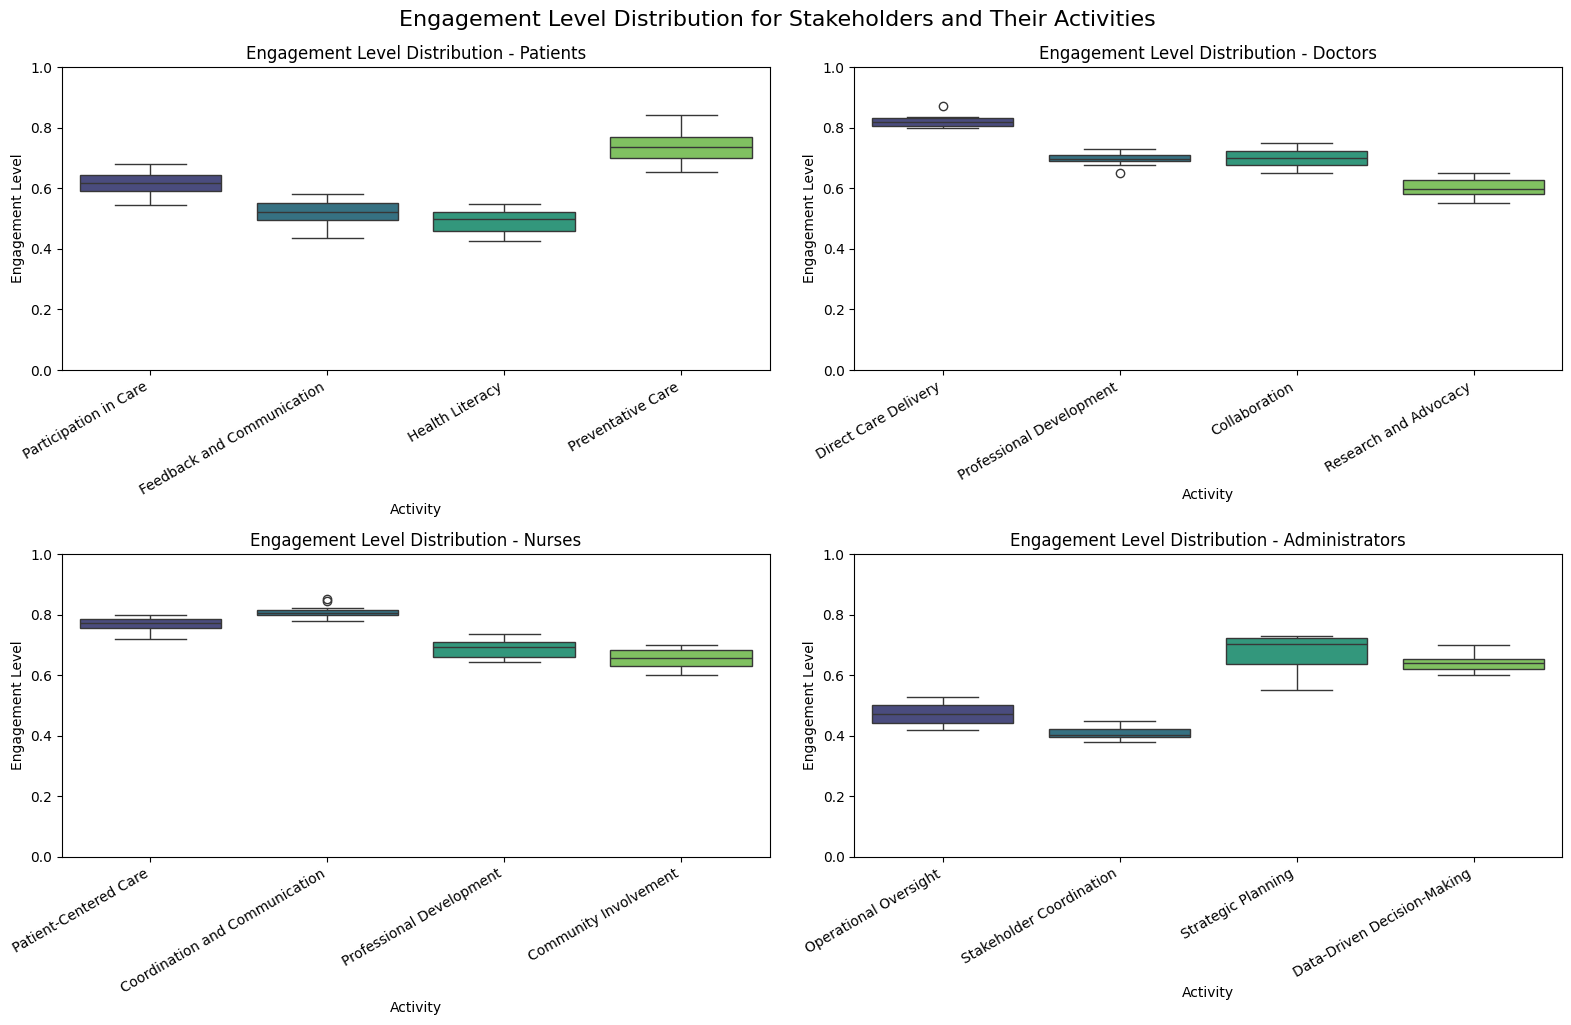

In [13]:
# Statistical Distribution Visualization for Stakeholders and Activities
plt.figure(figsize=(16, 10))

# Create a subplot for each stakeholder
stakeholders_list = df_activity_engagement['Stakeholder'].unique()
for i, stakeholder in enumerate(stakeholders_list, 1):
    plt.subplot(2, 2, i)
    stakeholder_df = df_activity_engagement[df_activity_engagement['Stakeholder'] == stakeholder]
    
    # Create a boxplot for each activity
    sns.boxplot(data=stakeholder_df, x='Activity', y='Engagement', hue='Activity', palette="viridis", dodge=False)
    
    # Enhance plot appearance
    plt.title(f"Engagement Level Distribution - {stakeholder}")
    plt.xlabel("Activity")
    plt.ylabel("Engagement Level")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha='right')

# Adjust layout
plt.tight_layout()
plt.suptitle("Engagement Level Distribution for Stakeholders and Their Activities", fontsize=16, y=1.02)
plt.show()
